In [805]:
### Шаги для анализа:

# 1. Загрузка данных и ознакомление.
# 2. Предобработка данных (удаление дубликатов, обработка пропущенных значений, выбросов).
# 3. Визуализация данных.
# 4. Построение и оценка моделей машинного обучения.
# 5. Улучшение моделей на основе метрик качества.
# 6. Интерпретация результатов.

### 1. Загрузка данных и ознакомление

import pandas as pd

# Загрузка данных
df = pd.read_csv('data\heart_disease_uci.csv')

# Первые несколько строк данных
display(df.head())

# Основные статистические показатели
print(df.describe())

print(df.info())

# Проверка на пропущенные значения
print(df.isnull().sum())

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [806]:
# Удаляем неинфрмативный признак
df = df.drop('origin', axis=1)
df = df.drop('id', axis=1)
# Удаление дубликатов
df = df.drop_duplicates()
# Удаляем неинформативные записи и признаки в которых более 70% пропусков
thresh_value_line = int(len(df.columns) * 0.7)
df = df.dropna(thresh=thresh_value_line)
thresh_value_col = len(df) * 0.7
df = df.dropna(axis = 1, thresh=thresh_value_col)

print(df.shape)
print(df.isnull().sum())

(864, 12)
age           0
sex           0
cp            0
trestbps      5
chol         26
fbs          90
restecg       2
thalch        1
exang         1
oldpeak       8
slope       253
num           0
dtype: int64


In [807]:
# Заполняем пропущенные значения с помощью fillna()
df.fillna({'trestbps': round(df['trestbps'].mean()),
           'chol': round(df['chol'].mean()),
           'fbs': df['fbs'].mode()[0],
           'restecg': df['restecg'].mode()[0],
           'thalch': round(df['thalch'].mean()), 
           'exang': df['fbs'].mode()[0],
           'oldpeak': round(df['oldpeak'].mean(), 1),
           'slope': df['slope'].mode()[0]
           }, inplace=True)

print(df.shape)
print(df.isnull().sum())

(864, 12)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64


C:\Users\ARTEM\AppData\Local\Temp\ipykernel_4916\2096897988.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [808]:
from sklearn.preprocessing import LabelEncoder

#Обработаем бинарные категориальные и числовые признаки
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

# С помощью LabelEncoder обработаем оставшиеся небинарные категориальные данные
le = LabelEncoder()
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])

display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,62,1,0,158.0,170.0,0,2,138.0,1,0.0,1,1
914,46,1,0,134.0,310.0,0,1,126.0,0,0.0,1,2
915,54,0,0,127.0,333.0,1,2,154.0,0,0.0,1,1
917,55,1,0,122.0,223.0,1,2,100.0,0,0.0,1,2


In [809]:
import plotly.express as px

# Оценим распределение прогнозируемого атрибута
fig_0 = px.histogram(df['num'], title='Распределение прогнозируемого артибута')
fig_0.update_layout(xaxis_title='Прогнозируемый атрибут',
                    yaxis_title='Количество',
                    width=600,height=500)
fig_0.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

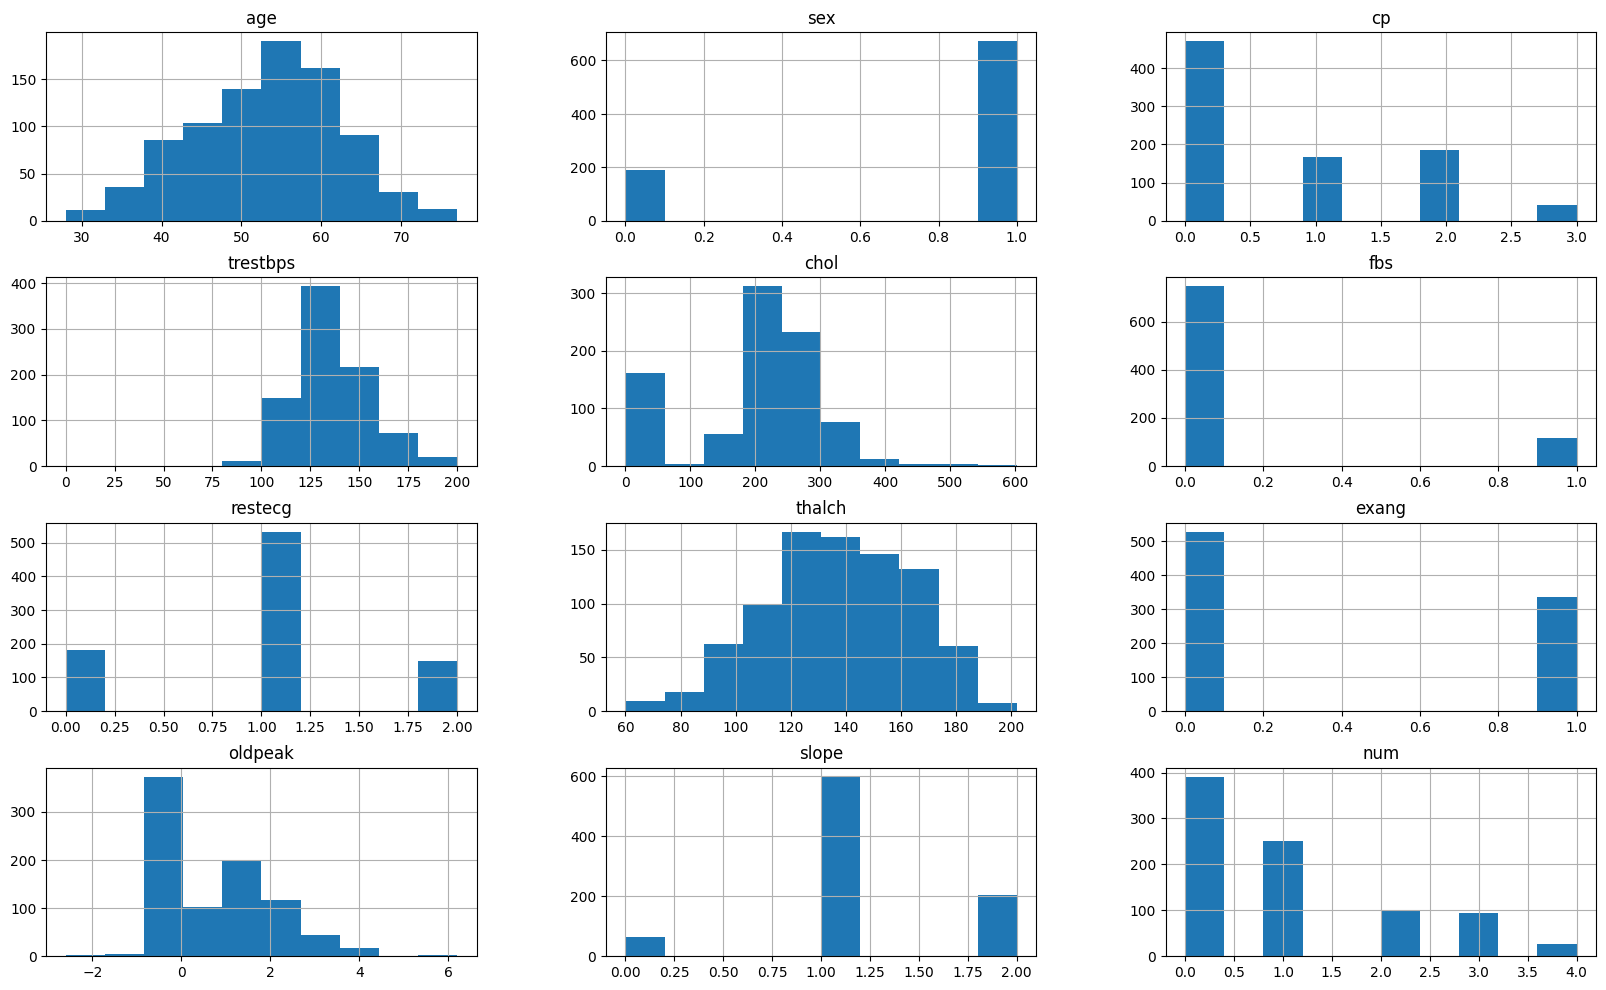

In [810]:
# Построим гистограммы для каждого признака
cols = df.columns
df[cols].hist(figsize=(20, 12))

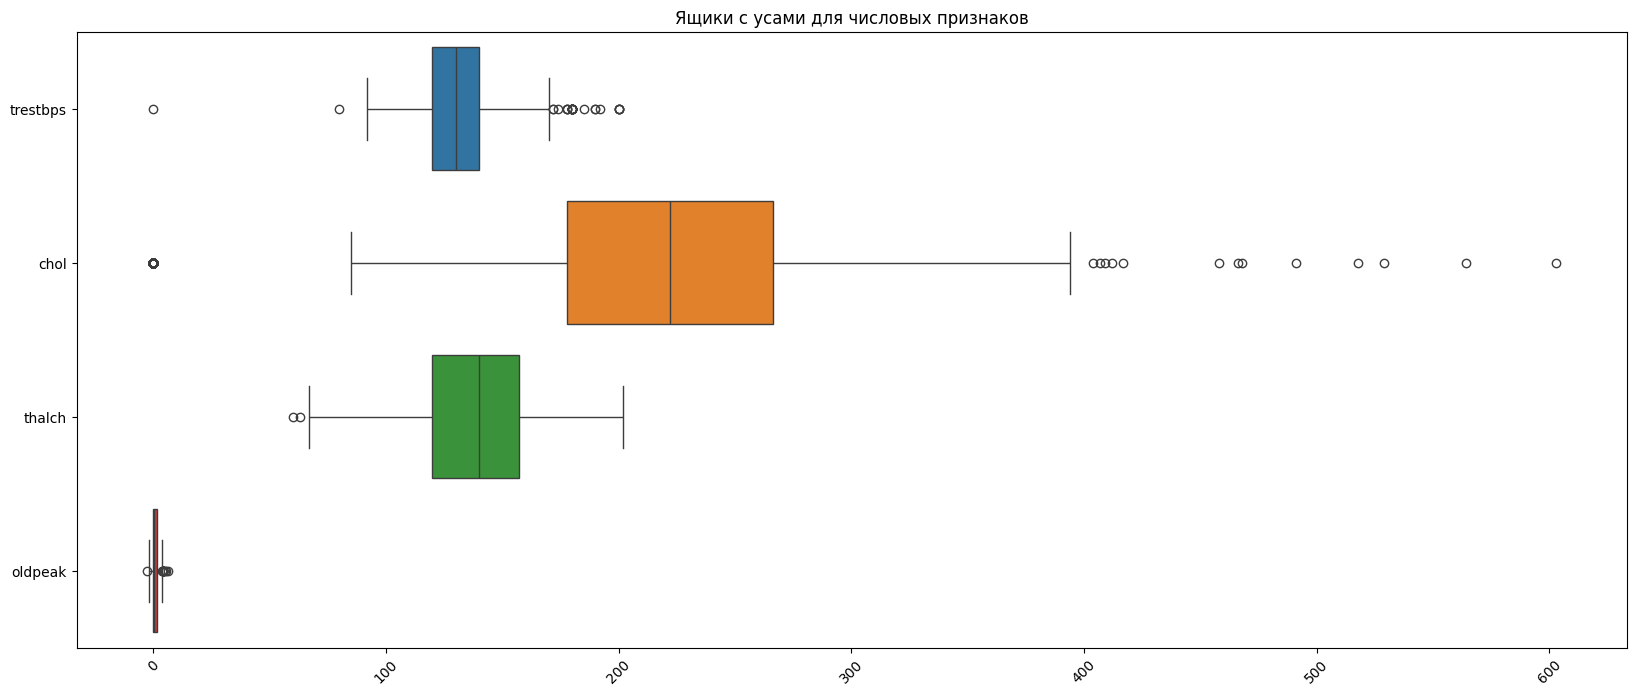

In [811]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим ящики с усами для числовых признаков
columns_to_plot = ['trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(20, 8))
sns.boxplot(data=df[columns_to_plot], orient='h')
plt.title('Ящики с усами для числовых признаков')
plt.xticks(rotation=45)
plt.show()

Признаки имеют выбросы, от них нужно избавиться

In [812]:
# Создаём функцию для удаления выбросов
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Список столбцов для обработки
columns_to_process = ['trestbps', 'chol', 'thalch', 'oldpeak']
# Обработка выбросов в указанных столбцах
df = remove_outliers_iqr(df, columns_to_process)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       657 non-null    int64  
 1   sex       657 non-null    int64  
 2   cp        657 non-null    int32  
 3   trestbps  657 non-null    float64
 4   chol      657 non-null    float64
 5   fbs       657 non-null    int32  
 6   restecg   657 non-null    int32  
 7   thalch    657 non-null    float64
 8   exang     657 non-null    int32  
 9   oldpeak   657 non-null    float64
 10  slope     657 non-null    int32  
 11  num       657 non-null    int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 53.9 KB


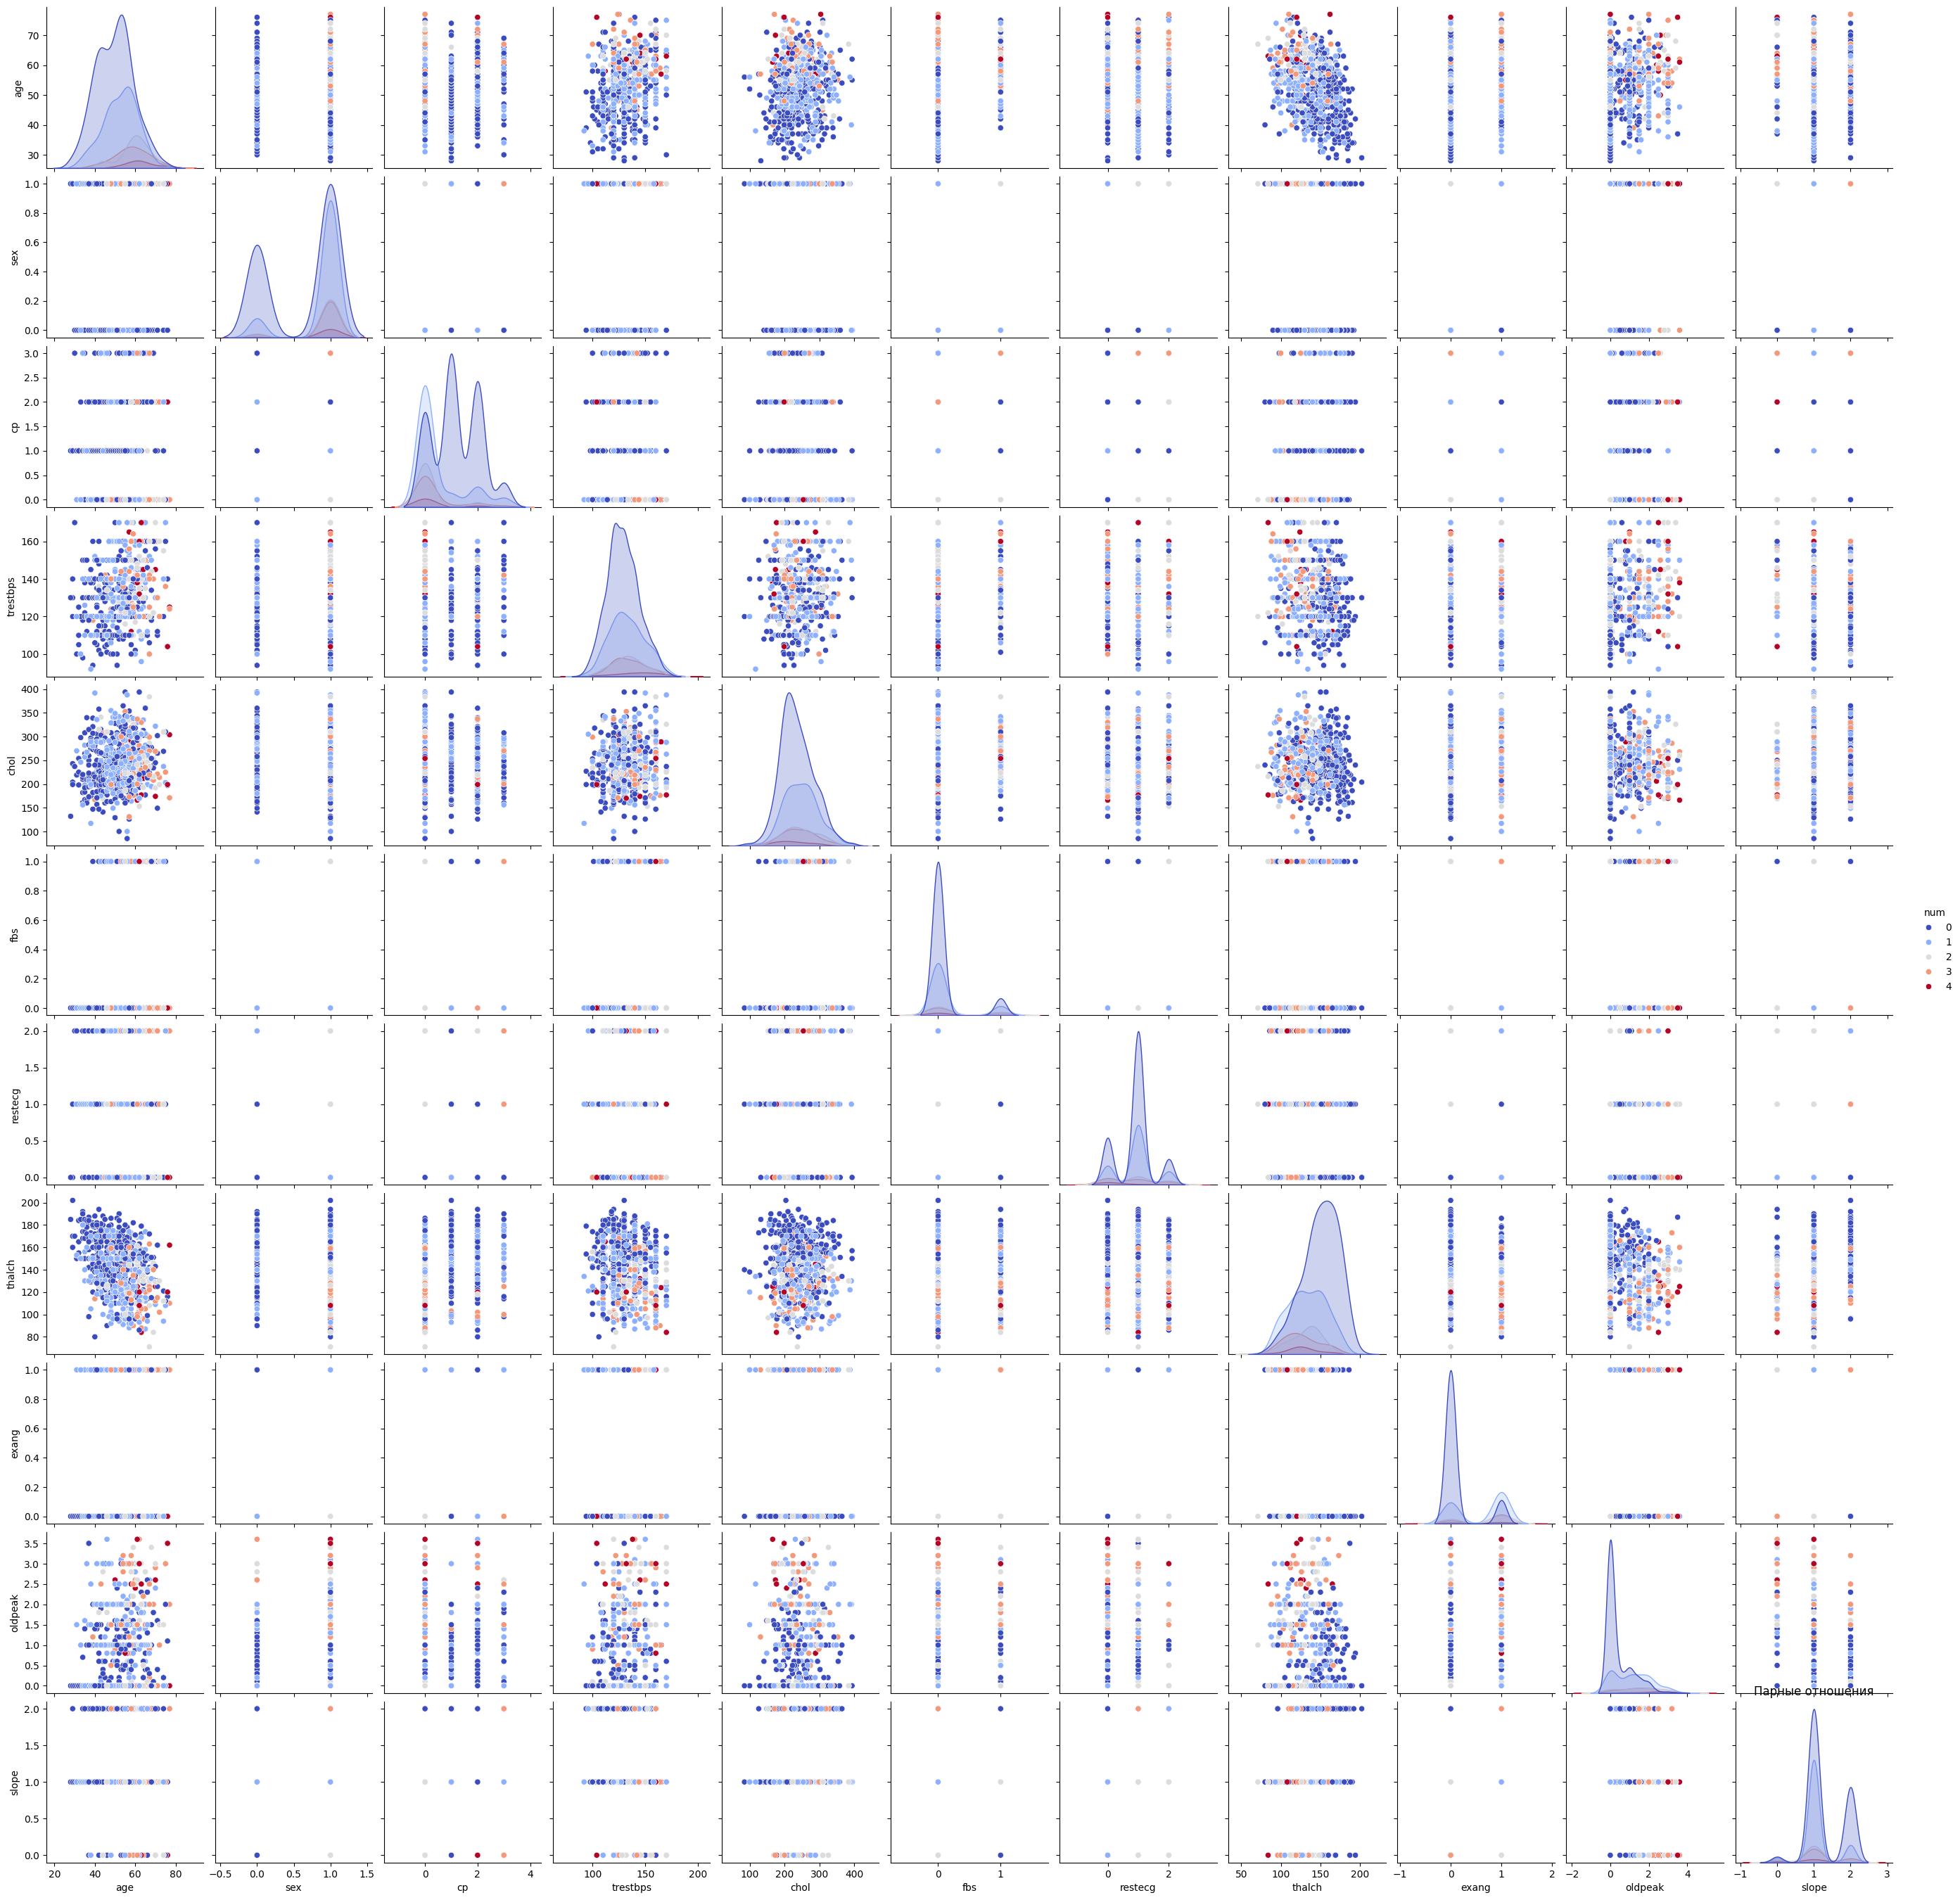

In [813]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация pairplot
sns.pairplot(df, hue ='num', palette='coolwarm')
plt.title('Парные отношения')
plt.show()

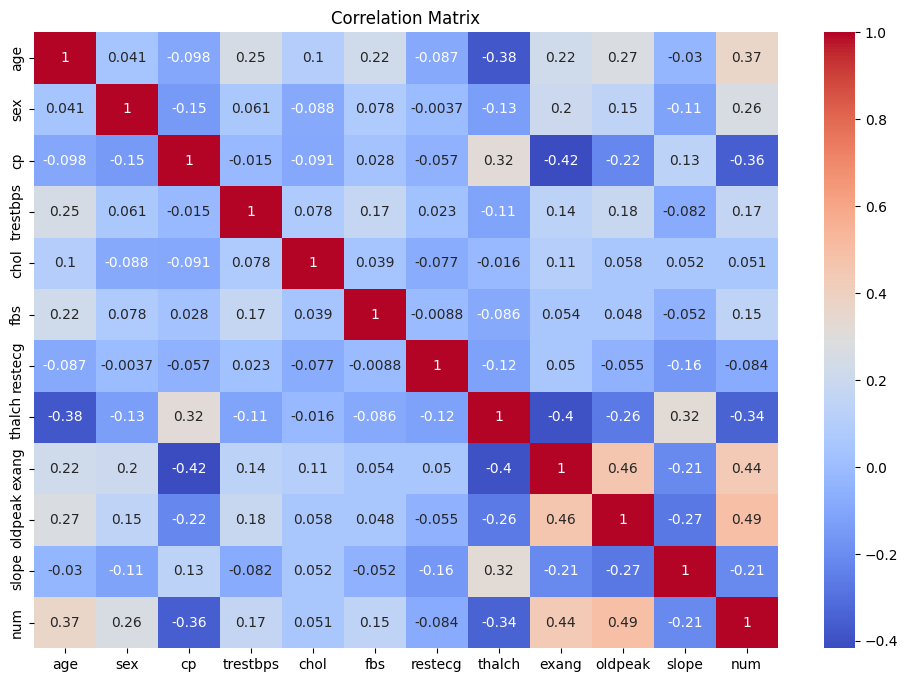

In [814]:
# Визуализация корреляционной матрицы
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Корреляция признаков с целевой переменной num:**

1. oldpeak (депрессия ST, вызванная нагрузкой по сравнению с отдыхом)
Корреляция: Сильная положительная корреляция с num (0.49).

Депрессия ST на ЭКГ, вызванная физической нагрузкой, часто указывает на ишемию миокарда, что является одним из ключевых признаков ишемической болезни сердца (ИБС). Чем выше значение oldpeak, тем больше вероятность наличия сердечного заболевания. Это объясняет положительную корреляцию.

2. cp (тип боли в груди)
Корреляция: Значительная отрицательная корреляция с num (-0.36).

Тип боли в груди кодируется следующим образом: 0 - бессимптомная, 1 - атипичная стенокардия, 2 - неангинальная боль, 3 - типичная стенокардия. Бессимптомные случаи (0) чаще ассоциируются с высоким риском заболевания, что приводит к отрицательной корреляции. То есть, если у пациента типичная стенокардия, вероятность заболевания ниже, чем если у него бессимптомная форма.

3. exang (стенокардия, вызванная физической нагрузкой)
Корреляция: Значительная положительная корреляция с num (0.44).

Стенокардия, вызванная физической нагрузкой, является признаком наличия коронарной недостаточности. Если физическая нагрузка вызывает стенокардию, это указывает на значительные проблемы с коронарными артериями, что увеличивает вероятность наличия заболевания сердца.

4. thalach (максимальная частота сердечных сокращений)
Корреляция: Значительная отрицательная корреляция с num (-0.34).

Максимальная частота сердечных сокращений обычно ниже у пациентов с заболеваниями сердца, особенно при физической нагрузке. Это связано с ухудшением функции сердца, что ограничивает его способность увеличивать частоту сокращений. Поэтому более низкие значения thalach связаны с высоким риском заболевания сердца.

5. slope (наклон пикового сегмента ST при нагрузке)
Корреляция: Отрицательная корреляция с num (-0.21).

 Наклон сегмента ST кодируется следующим образом: 0 - нисходящий, 1 - горизонтальный, 2 - восходящий. Нисходящий наклон (0) или горизонтальный (1) могут указывать на более серьезные изменения ишемии миокарда, что связано с повышенным риском сердечных заболеваний. Это объясняет отрицательную корреляцию, где менее благоприятные наклоны (нисходящий и горизонтальный) чаще связаны с положительным значением num.

6. age (Возраст пациента в годах)
Корреляция: Умеренная положительная корреляция с num (0.37).

Возраст является одним из значимых факторов риска развития сердечно-сосудистых заболеваний. С увеличением возраста увеличивается вероятность наличия заболеваний сердца, что объясняет положительную корреляцию.

7. sex (Мужской/Женский)
Корреляция: Положительная корреляция с num (0.26).

Мужчины имеют более высокий риск развития сердечно-сосудистых заболеваний по сравнению с женщинами до менопаузы. Это может объяснить положительную корреляцию, где мужской пол связан с более высокой вероятностью заболевания сердца.

In [815]:
# Выбор признаков с выраженной корреляцией
selected_features = ['oldpeak', 'cp', 'exang', 'thalch', 'age', 'sex', 'num']

# Создание нового DataFrame
df_selected = df[selected_features]

from scipy.stats import shapiro

# Проверяем данные на нормальность
for column in df_selected.columns:
    if column != 'num':
        stat, p = shapiro(df_selected[column])
        print(f'Шапиро Уилк для признака {column}:')
        print(f'Statistics={stat}, p-value={p}')
        alpha = 0.05
        if p > alpha:
            print(f'{column} выглядит как нормально распределенная (не отвергаем нулевую гипотезу)')
        else:
            print(f'{column} не выглядит как нормально распределенная (отвергаем нулевую гипотезу)')
        print()

Шапиро Уилк для признака oldpeak:
Statistics=0.8098482281336439, p-value=4.201562356296233e-27
oldpeak не выглядит как нормально распределенная (отвергаем нулевую гипотезу)

Шапиро Уилк для признака cp:
Statistics=0.7899051624981084, p-value=2.961800671240699e-28
cp не выглядит как нормально распределенная (отвергаем нулевую гипотезу)

Шапиро Уилк для признака exang:
Statistics=0.6057519751069957, p-value=4.138111202527516e-36
exang не выглядит как нормально распределенная (отвергаем нулевую гипотезу)

Шапиро Уилк для признака thalch:
Statistics=0.9854435459966229, p-value=3.9962109830937865e-06
thalch не выглядит как нормально распределенная (отвергаем нулевую гипотезу)

Шапиро Уилк для признака age:
Statistics=0.9941443693063201, p-value=0.012230782775281425
age не выглядит как нормально распределенная (отвергаем нулевую гипотезу)

Шапиро Уилк для признака sex:
Statistics=0.5432418449120631, p-value=4.3074684441607945e-38
sex не выглядит как нормально распределенная (отвергаем нулеву

Признаки не имеют нормального распределния.

In [816]:
from scipy.stats import spearmanr

# Учитывая отсутсвие нормального распределния признака,
# применим Корреляцию Спирмена для оценки статистической значимости
correlations = {}
for feature in selected_features:
    if feature != 'num':
        corr, p_value = spearmanr(df_selected[feature], df_selected['num'])
        correlations[feature] = (corr, p_value)
        print(f'Корреляция Спирмена {feature} и num: {corr}')
        alpha = 0.05
        if p_value < alpha:
            significance = 'Корреляция значимая'
        else:
            significance = 'Корреляция незначимая'
        print(f'p-value: {p_value}, {significance}')
        print()

Корреляция Спирмена oldpeak и num: 0.49787355044950854
p-value: 1.9008747072678592e-42, Корреляция значимая

Корреляция Спирмена cp и num: -0.46023647949534724
p-value: 9.408028523769843e-36, Корреляция значимая

Корреляция Спирмена exang и num: 0.5076228390755835
p-value: 2.538941281978353e-44, Корреляция значимая

Корреляция Спирмена thalch и num: -0.3850194080229492
p-value: 1.211596447367416e-24, Корреляция значимая

Корреляция Спирмена age и num: 0.3592564621476383
p-value: 1.9019307733108494e-21, Корреляция значимая

Корреляция Спирмена sex и num: 0.30135398732018376
p-value: 2.9304208975945432e-15, Корреляция значимая



Корреляции всех признаков статистичекси значимы. Используем эти признаки для построения модели машинного обучения.

C:\Users\ARTEM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



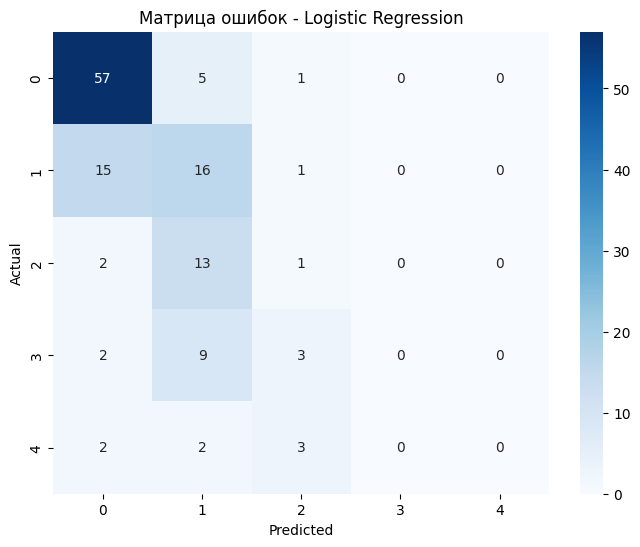

C:\Users\ARTEM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



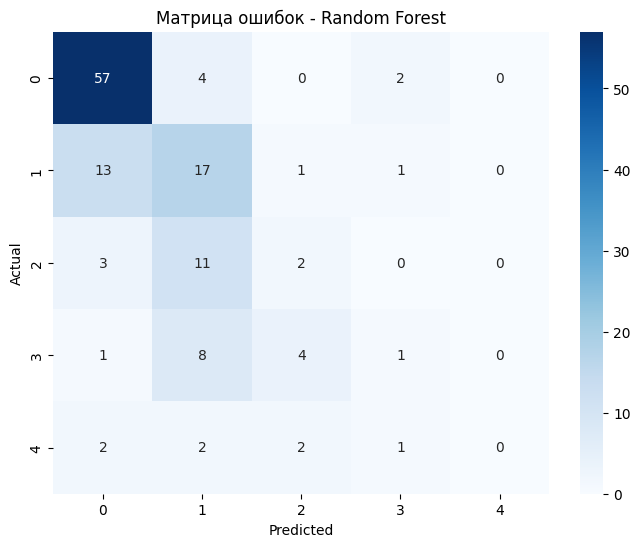

C:\Users\ARTEM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



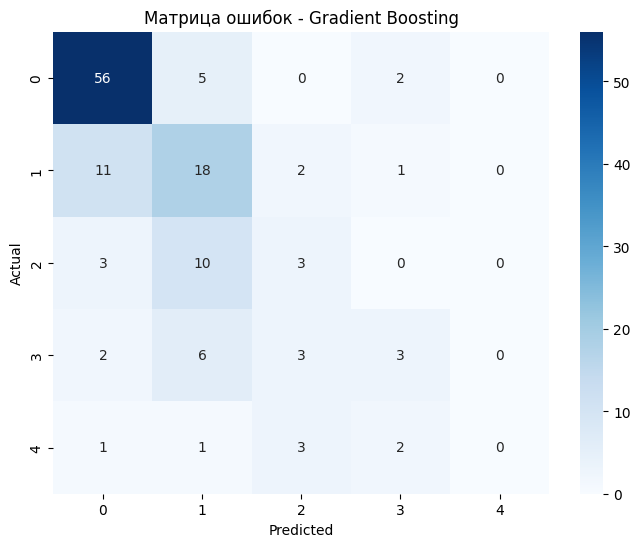

           Logistic Regression  Random Forest  Gradient Boosting
Accuracy              0.560606       0.583333           0.606061
Precision             0.448440       0.504227           0.548049
Recall                0.560606       0.583333           0.606061


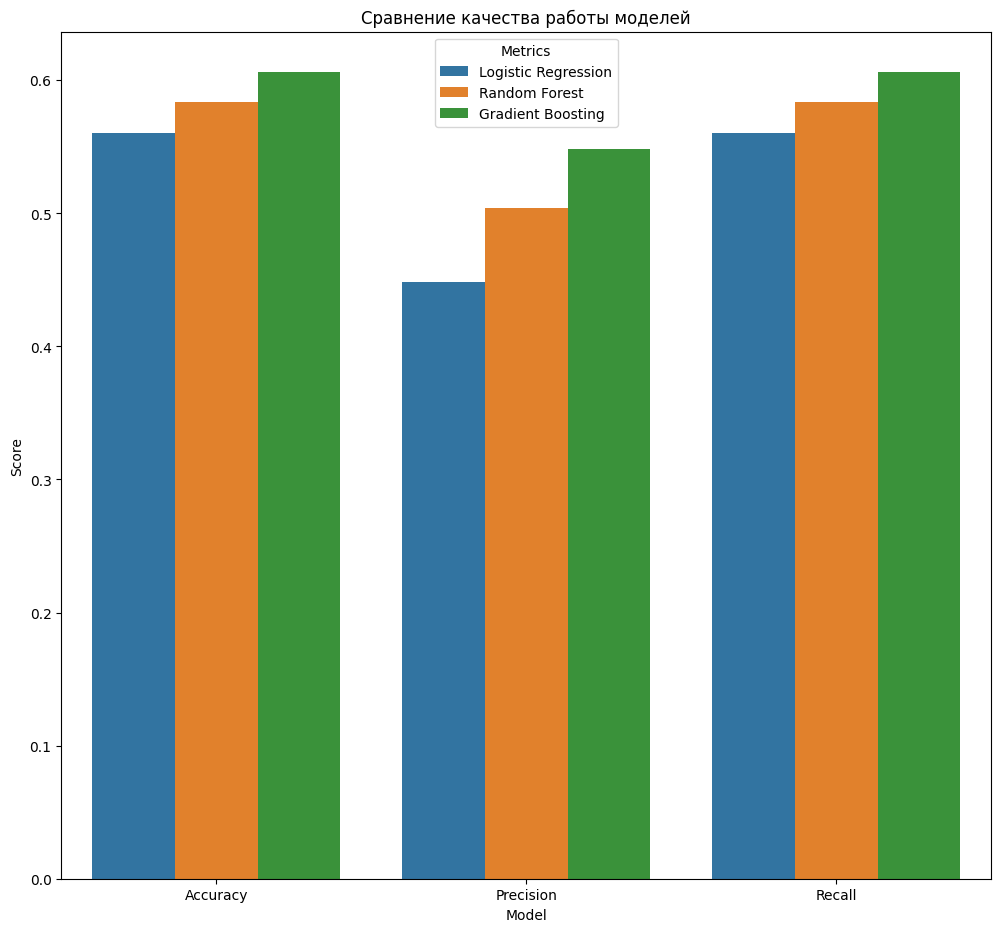

In [817]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Разделим данные на тренировочную и тестовую выборки
X = df_selected.drop('num', axis=1)
y = df_selected['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для обучения и оценки моделей
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, y_pred

# Модели для сравнения
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Оценка моделей, построение матриц ошибок
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, y_pred= evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Вывод результатов
results_df = pd.DataFrame(results)
print(results_df)

# Визуализация результатов
plt.figure(figsize=(12, 11))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'),
            x='index', y='value', hue='variable')
plt.title('Сравнение качества работы моделей')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.show()


**Итоговый вывод:**

Градиентный бустинг демонстрирует наилучшие результаты по всем трем метрикам, что делает его предпочтительной моделью для данной задачи.